# Overwatch with Friends

## Generic preparation and explore

In [1]:
import datetime as dt
import re
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('data/discord.csv')
df.head().append(df.tail())

,created_at_utc,author,avatar,message
0,2016-09-30 18:30:19.207,al29,https://cdn.discordapp.com/avatars/23112273806...,👉🏿 👌🏻 👈
1,2016-09-30 18:31:01.694,al29,https://cdn.discordapp.com/avatars/23112273806...,🍛
2,2016-09-30 18:31:07.712,Agrol,https://cdn.discordapp.com/avatars/15859088968...,🍆
3,2016-09-30 18:31:13.428,al29,https://cdn.discordapp.com/avatars/23112273806...,🌭
4,2016-09-30 18:31:16.153,killme2pa3a,https://cdn.discordapp.com/avatars/23112266413...,🐙
101896,2020-11-20 13:56:44.847,RickySparrow,https://cdn.discordapp.com/avatars/19919896945...,"уф. Поздна. Сейчас 7, ну притопаю к пол 11 мб"
101897,2020-11-20 13:57:16.537,killme2pa3a (again),https://cdn.discordapp.com/avatars/23112266413...,"оке, позовешь если захочешь"
101898,2020-11-20 13:57:36.635,RickySparrow,https://cdn.discordapp.com/avatars/19919896945...,👌
101899,2020-11-20 18:07:12.529,killme2pa3a (again),https://cdn.discordapp.com/avatars/23112266413...,"Такс, теперь точно дота @assond @myxa-sb9 @Tom..."
101900,2020-11-20 18:08:08.869,RickySparrow,https://cdn.discordapp.com/avatars/19919896945...,"не, я пас, я в кроватку"


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101901 entries, 0 to 101900
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   created_at_utc  101901 non-null  object
 1   author          101901 non-null  object
 2   avatar          101901 non-null  object
 3   message         95024 non-null   object
dtypes: object(4)
memory usage: 41.0 MB


Empty messages a lot of see I can. These are attachments and files.

In [4]:
df.dropna(inplace=True)
len(df)

95024

In [5]:
df['author'].value_counts()

DV1X3R                   17841
Tomamura                 12208
assond                   10411
RusReality                8822
al29                      8279
TwiBot                    5393
killme2pa3a (again)       5181
LyraBot                   4249
myxa-sb9                  3591
Oreh                      3447
QuadICE                   3180
Agrol                     3055
killme2pa3a               1910
Warfaaren                 1679
EmBot                      934
RickySparrow               887
WildBot                    801
SteiN                      597
Bantyr                     579
Tomamura 2 БАР             558
OmniO                      397
BugsBot                    322
UndRain                    184
Deleted User               109
Sunny Way                   89
Mantaro                     54
Карманная Женечка           52
Randoom                     41
Night Shade                 31
kryzhov_ilya                24
Mary                        20
Slim Fox                    14
yuurenky

Yikes, thats a lot of people. I will keep only our main team and merge their second accounts.

In [6]:
df['author'].replace({
        'killme2pa3a (again)': 'killme2pa3a',
        'Tomamura 2 БАР': 'Tomamura',
    }, inplace=True)

<AxesSubplot:>

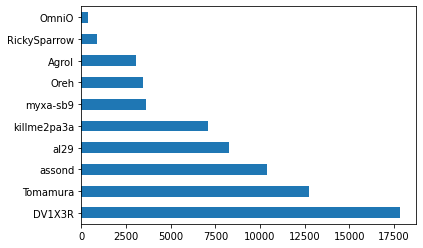

In [7]:
df = df[df['author'].isin(['DV1X3R', 'Tomamura', 'assond', 'al29', 'killme2pa3a', 'myxa-sb9', 'Oreh', 'Agrol', 'RickySparrow', 'OmniO'])]
df['author'].value_counts().plot(kind='barh')

## Messages analyze

## Overwatch

In [8]:
df['message_ow'] = df['message'].str.contains(r'(\bow\b)|(\bов\b)', flags=re.I)
df['message_over'] = df['message'].str.contains(r'(\bower\b)|(\bover\b)|(\bовер\b)|(\bоверовощ\b)|(\bовервощ\b)', flags=re.I)
df['message_overwatch_total'] = df['message_ow'] | df['message_over']

In [9]:
print((df['message_ow'] == True).sum())
print((df['message_over'] == True).sum())
print((df['message_overwatch_total'] == True).sum())

303
166
469


In [10]:
df.loc[df['message_overwatch_total'] == True, 'message'].sample(10)

84354     <@​&335374979837329409> ow на часик не хотите ?
65067                     ?jv <@​&335374979837329409> ow?
80365            <@​&335374979837329409> @OW там ивент же
99830                             @DV1X3R В овер пойдешь?
100971                                          @Oreh OW?
81348                             @DV1X3R пойдешь в овер?
101347                          @DV1X3R @al29 @Oreh овер?
52122                                         @assond ow?
47111                                                  ow
74813                          <@​&335374979837329409> ow
Name: message, dtype: object

<AxesSubplot:ylabel='author'>

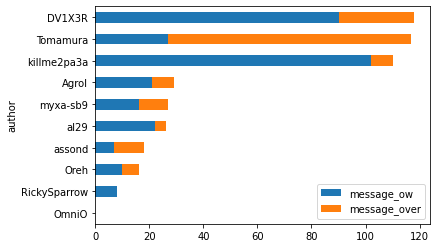

In [11]:
df.pivot_table(values=['message_ow', 'message_over', 'message_overwatch_total'], index='author', aggfunc='sum') \
    .sort_values('message_overwatch_total') \
    .plot(kind='barh', stacked=True, y=['message_ow', 'message_over'])

Gotcha, Top 3 Overwatch players on Discord server with breathtaking \> 100 battle cries! Impressive!  
It is interesting to mention, that unlike the others, Tomamura uses 'over' more than 'ow' word.

In [12]:
df.loc[(df['message_overwatch_total'] == True) & (df['author'] == 'myxa-sb9'), 'message'].sample(10)

81893                                    Это овер, сладкий
95445                   @killme2pa3a (again) овер пойдешь?
93476           @killme2pa3a (again) го нетфликс или овер?
95164                              @killme2pa3a (again) ов
65062              @QuadICE Я через часика-два смогу в ОВ.
65676     @killme2pa3a (again) эй, степашка го с нами в ОВ
95165                               @DV1X3R ов или тетрис?
93430                 @killme2pa3a (again) овер не хочешь?
65787    @DV1X3R @killme2pa3a (again) не хотите в гт5 и...
65607    @​everyone  пойдем сражаться против чубриков в...
Name: message, dtype: object

## Data Good Export Let's
Remove non overwatch messages and add GMT+3 DateTime column.

In [13]:
df = df[df['message_overwatch_total'] == True]
df['created_at_msk'] = pd.to_datetime(df['created_at_utc']) + dt.timedelta(hours=3)
df[['created_at_utc', 'created_at_msk']].sample(10)

,created_at_utc,created_at_msk
82161,2018-09-05 18:42:53.078,2018-09-05 21:42:53.078
69022,2017-12-21 16:16:36.387,2017-12-21 19:16:36.387
82160,2018-09-05 18:27:10.803,2018-09-05 21:27:10.803
20902,2016-12-14 12:24:51.950,2016-12-14 15:24:51.950
14331,2016-11-01 14:12:23.641,2016-11-01 17:12:23.641
11340,2016-10-21 13:57:16.093,2016-10-21 16:57:16.093
76938,2018-05-12 17:59:35.933,2018-05-12 20:59:35.933
100308,2020-08-08 21:14:48.804,2020-08-09 00:14:48.804
65098,2017-10-06 05:13:20.803,2017-10-06 08:13:20.803
72199,2018-02-13 19:17:34.129,2018-02-13 22:17:34.129


In [14]:
df[['created_at_msk', 'author', 'avatar', 'message', 'message_ow', 'message_over']].to_csv('data/overwatch.csv', index=False)

Power BI Dashboard and Power Point presentation cannot be found here.